# Sentiment Anaysis

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import PIL

print(tf.__version__)

2.9.2


## Data preprocessing

In [2]:
train_dir = 'face_expression_recognition_dataset/train'
validation_dir = 'face_expression_recognition_dataset/test'
test_dir = 'face_expression_recognition_dataset/test'

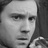

In [3]:
try_img = PIL.Image.open(train_dir+'/angry/0.jpg')
try_img

In [4]:
print("Mode of the data: ", try_img.mode) # L -> GrayScale
print("Size of Images: ", try_img._size)

Mode of the data:  L
Size of Images:  (48, 48)


In [5]:
try_img.__dict__

{'im': <ImagingCore at 0x15a1739f0>,
 'mode': 'L',
 '_size': (48, 48),
 'palette': None,
 'info': {'jfif': 257,
  'jfif_version': (1, 1),
  'jfif_unit': 0,
  'jfif_density': (1, 1)},
 '_category': 0,
 'readonly': 0,
 'pyaccess': None,
 '_exif': None,
 '_min_frame': 0,
 'custom_mimetype': None,
 'tile': [],
 'decoderconfig': (),
 'decodermaxblock': 65536,
 'fp': None,
 'filename': 'face_expression_recognition_dataset/train/angry/0.jpg',
 '_exclusive_fp': True,
 'bits': 8,
 'layers': 1,
 'layer': [(1, 1, 1, 0)],
 'huffman_dc': {},
 'huffman_ac': {},
 'quantization': {0: [2,
   1,
   1,
   2,
   2,
   4,
   5,
   6,
   1,
   1,
   1,
   2,
   3,
   6,
   6,
   6,
   1,
   1,
   2,
   2,
   4,
   6,
   7,
   6,
   1,
   2,
   2,
   3,
   5,
   9,
   8,
   6,
   2,
   2,
   4,
   6,
   7,
   11,
   10,
   8,
   2,
   4,
   6,
   6,
   8,
   10,
   11,
   9,
   5,
   6,
   8,
   9,
   10,
   12,
   12,
   10,
   7,
   9,
   10,
   10,
   11,
   10,
   10,
   10]},
 'app': {'APP0': b'JFIF\x00

In [6]:
import glob

print("Happy: ", len(glob.glob(train_dir+'/happy/*')))
print("Angry: ", len(glob.glob(train_dir+'/angry/*')))
print("Fear: ", len(glob.glob(train_dir+'/fear/*')))
print("Neutral: ", len(glob.glob(train_dir+'/neutral/*')))
print("Sad: ", len(glob.glob(train_dir+'/sad/*')))

Happy:  4164
Angry:  3993
Fear:  0
Neutral:  4982
Sad:  4938


In [7]:
# from random import sample
# import os

# files = os.listdir(train_dir+'/happy/')
# for file in sample(files, 3000):
#     os.remove(train_dir+'/happy/'+file)

In [8]:
import glob

print("Happy: ", len(glob.glob(train_dir+'/happy/*')))
print("Angry: ", len(glob.glob(train_dir+'/angry/*')))
print("Fear: ", len(glob.glob(train_dir+'/fear/*')))
print("Neutral: ", len(glob.glob(train_dir+'/neutral/*')))
print("Sad: ", len(glob.glob(train_dir+'/sad/*')))

Happy:  4164
Angry:  3993
Fear:  0
Neutral:  4982
Sad:  4938


In [9]:
IMAGE_SIZE = try_img._size
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                      ##    '''DATA AUGMENTATION TECHNIQUES'''   ##
                                    rotation_range=10,
                                    zoom_range = 0.1,
                                    # width_shift_range=0.1,
#                                     height_shift_range=0.1
                                  )

train_generator = train_datagen.flow_from_directory(
    train_dir,   #path to the training dataset
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE, 
    class_mode ='categorical')  #binary.. since we have two classes only

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = IMAGE_SIZE,
    batch_size = BATCH_SIZE,
    class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = IMAGE_SIZE,
    batch_size = 8,
    class_mode = 'categorical')

Found 18077 images belonging to 4 classes.
Found 5140 images belonging to 4 classes.
Found 5140 images belonging to 4 classes.


## Model Architecture

In [10]:
IMAGE_SIZE

(48, 48)

In [11]:
### train_generator.__dict__

'''
'target_size': (48, 48),
 'keep_aspect_ratio': False,
 'color_mode': 'rgb',
 'data_format': 'channels_last',
 'image_shape': (48, 48, 3),
 'save_to_dir': None,
 'save_prefix': '',
 'save_format': 'png',
 'interpolation': 'nearest',
 'split': None,
 'subset': None,
 'directory': 'face_expression_recognition_dataset/train',
 'classes': array([0, 0, 0, ..., 4, 4, 4], dtype=int32),
 'class_mode': 'categorical',
 'dtype': 'float32',
 'samples': 25180,
 'num_classes': 5,
 'class_indices': {'angry': 0, 'fear': 1, 'happy': 2, 'neutral': 3, 'sad': 4},
 'n': 25180,
 'batch_size': 32,
 'seed': None,
 'shuffle': True,
'''

print()

In [22]:
INPUT_SHAPE = IMAGE_SIZE + (3, )
print(INPUT_SHAPE)

model = tf.keras.models.Sequential([                               
    tf.keras.layers.Conv2D(32, (3, 3), activation='leaky_relu', input_shape=INPUT_SHAPE, padding="same"),
    # tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.BatchNormalization(epsilon=1e-04, momentum=0.9),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(32, (3, 3), activation='leaky_relu'), #tf.nn.leaky_relu(alpha=0.2)
    # tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.BatchNormalization(epsilon=1e-04, momentum=0.9),
    tf.keras.layers.Conv2D(32, (3, 3), activation='leaky_relu'), #tf.nn.leaky_relu(alpha=0.2)
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(256, activation='leaky_relu'),# kernel_regularizer=keras.regularizers.l1_l2(0.01)),
    tf.keras.layers.Dense(128, activation='leaky_relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.summary()

(48, 48, 3)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 46, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 46, 46, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 44, 44, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 2

In [23]:
# optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(), 
    optimizer='adam',  #RMSprop
    metrics=['accuracy'])

In [24]:
STEPS_PER_EPOCH = 18077//BATCH_SIZE
VALIDATION_STEPS = 5140//BATCH_SIZE

In [25]:
history = model.fit(train_generator, 
            epochs=35,
            steps_per_epoch = STEPS_PER_EPOCH,
            validation_data = validation_generator,
            validation_steps = VALIDATION_STEPS, 
            verbose=1)

Epoch 1/35


2022-06-27 01:09:40.055903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


563/564 [============================>.] - ETA: 0s - loss: 1.3896 - accuracy: 0.3713

2022-06-27 01:09:50.307323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


564/564 [==============================] - 12s 20ms/step - loss: 1.3894 - accuracy: 0.3712 - val_loss: 1.1927 - val_accuracy: 0.4711
Epoch 2/35
564/564 [==============================] - 10s 18ms/step - loss: 1.2370 - accuracy: 0.4325 - val_loss: 1.1178 - val_accuracy: 0.5078
Epoch 3/35
564/564 [==============================] - 10s 17ms/step - loss: 1.1713 - accuracy: 0.4736 - val_loss: 1.0897 - val_accuracy: 0.5297
Epoch 4/35
564/564 [==============================] - 9s 17ms/step - loss: 1.1147 - accuracy: 0.5054 - val_loss: 1.0460 - val_accuracy: 0.5436
Epoch 5/35
564/564 [==============================] - 10s 17ms/step - loss: 1.0673 - accuracy: 0.5290 - val_loss: 0.9825 - val_accuracy: 0.5758
Epoch 6/35
564/564 [==============================] - 10s 17ms/step - loss: 1.0075 - accuracy: 0.5654 - val_loss: 1.1119 - val_accuracy: 0.5516
Epoch 7/35
564/564 [==============================] - 10s 18ms/step - loss: 0.9793 - accuracy: 0.5821 - val_loss: 0.9940 - val_accuracy: 0.5900
Epoc

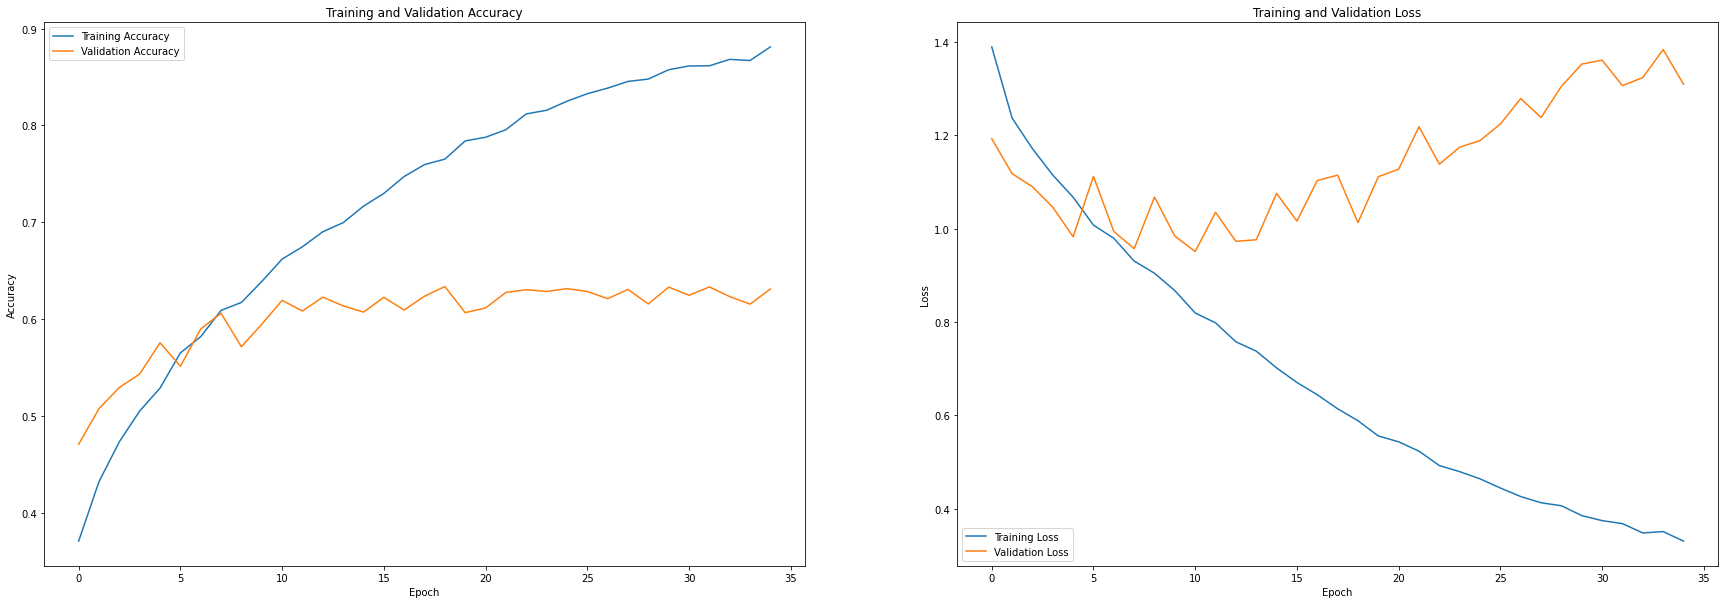

In [35]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']   #if you are usinf tf version 1.x then use 'acc' instead of 'accuracy'
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig = plt.subplots(figsize=(30, 10))

plt.subplot(1, 2, 1)
plt.plot(acc)
plt.plot(val_acc)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])

plt.subplot(1, 2, 2)
plt.plot(loss)
plt.plot(val_loss)
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])

plt.show()

In [36]:
_, model_accuracy = model.evaluate(
    test_generator, verbose=0)

print(model_accuracy)

0.6321011781692505


# FaceDetection

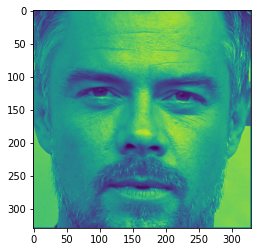

In [106]:
import util
import matplotlib.pyplot as plt

he = util.face('j1.jpeg')
img2 = he.cropDetect()
plt.imshow(img2)

In [90]:
type(img2)

numpy.ndarray

In [101]:
import cv2

img = cv2.cvtColor(img2, cv2.COLOR_GRAY2RGB)
resized = cv2.resize(img, (48,48), interpolation = cv2.INTER_LANCZOS4)
print(resized.shape)

img_batch = np.expand_dims(resized, 0)
print(img_batch.shape)

(48, 48, 3)
(1, 48, 48, 3)


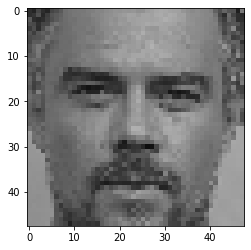

In [104]:
plt.imshow(resized)

In [102]:
y_val_pred = model.predict(img_batch)
# y_val_pred_1 = np.argmax(y_val_pred, axis=1)

print(y_val_pred)
# , "/n" ,y_val_pred_1)

2022-06-27 02:14:24.867426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 380ms/step
[[0. 0. 0. 1.]]


# Save Model

In [45]:
saved_model_path = 'trained-model/model-recent.h5'
model.save(saved_model_path)

1/1 [==============================] - 0s 10ms/step


array([[0., 1., 0., 0.]], dtype=float32)

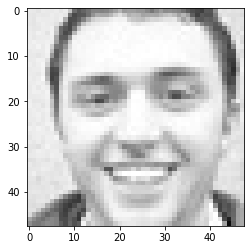

In [118]:
img = cv2.imread('face_expression_recognition_dataset/test/happy/30.jpg')
plt.imshow(img)
img = np.expand_dims(img, 0)
model.predict(img)

# Convert to json file

In [119]:
#!pip install tensorflowjs

In [60]:
#Use the tensorflow.js converter to convert the saved Keras model into JSON format.
!tensorflowjs_converter --input_format=keras {saved_model_path} ./

/bin/bash: tensorflowjs_converter: command not found


In [1]:

# import required modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [4]:
!pip install graphviz

In [2]:
savedModel=load_model('trained-model/model-recent.h5')
savedModel.summary()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-06-28 15:15:40.001925: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-28 15:15:40.002066: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_10 (Conv2D)          (None, 46, 46, 32)        9248      
                                                                 
 batch_normalization_7 (Batc  (None, 46, 46, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_11 (Conv2D)          (None, 44, 44, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 22, 22, 32)      

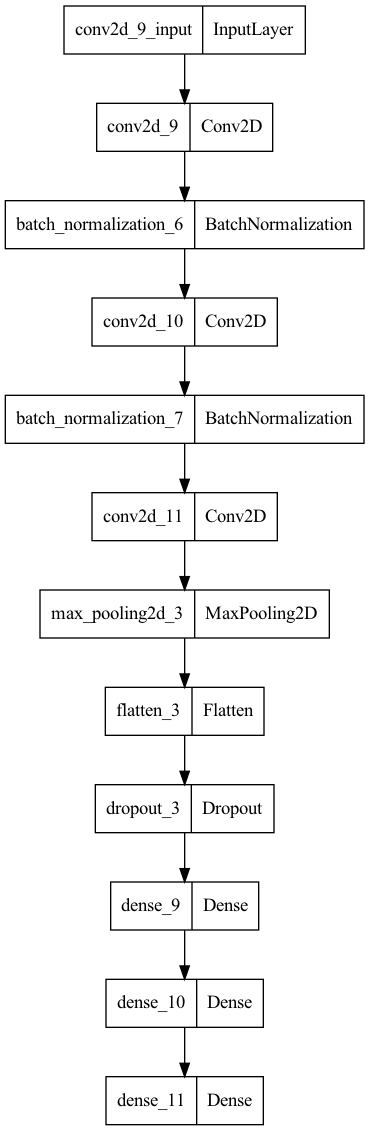

In [3]:
tf.keras.utils.plot_model(savedModel, to_file="my_model.png", show_shapes=False)